# 💼 Employee Salary Classification Project
This project predicts whether an individual earns more than $50K using demographic and job-related data.
**Technologies Used:** Python, Pandas, Scikit-learn, Streamlit


## 📥 Load Dataset

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/adult 3.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## 📊 Basic Exploration

In [5]:
# Show basic information
print(data.shape)
print(data.tail(3))
data.isna().sum()

(48842, 15)
       age     workclass  fnlwgt education  educational-num  \
48839   58       Private  151910   HS-grad                9   
48840   22       Private  201490   HS-grad                9   
48841   52  Self-emp-inc  287927   HS-grad                9   

           marital-status       occupation relationship   race  gender  \
48839             Widowed     Adm-clerical    Unmarried  White  Female   
48840       Never-married     Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse  Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


## 🧹 Data Cleaning - Missing Values

In [6]:
print(data['workclass'].value_counts())
data['workclass'].replace({'?': 'Others'}, inplace=True)
print(data['workclass'].value_counts())

print(data['occupation'].value_counts())
data['occupation'].replace({'?': 'Others'}, inplace=True)
print(data['occupation'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
occupation
Prof-specialty       6

/tmp/ipython-input-6-4198638850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?': 'Others'}, inplace=True)
/tmp/ipython-input-6-4198638850.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

## 🧺 Remove Irrelevant Workclass Categories

In [7]:
data = data[(data['workclass'] != 'Without-pay') & (data['workclass'] != 'Never-worked')]
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


## 📌 Value Counts of Key Columns

In [8]:
print(data['relationship'].value_counts())
print(data['gender'].value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64
gender
Male      32629
Female    16182
Name: count, dtype: int64


## 📉 Outlier Detection and Removal

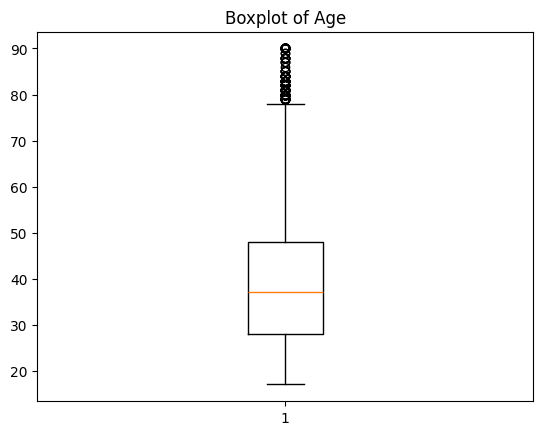

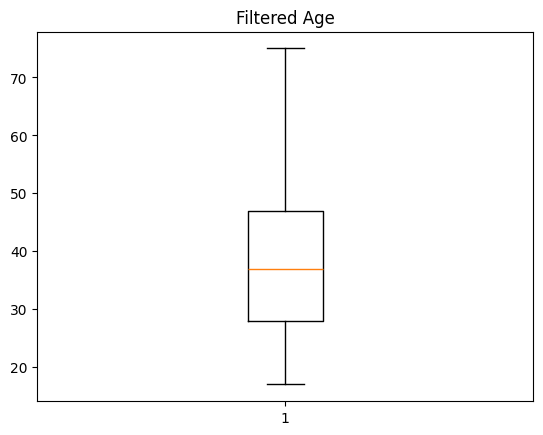

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.title('Boxplot of Age')
plt.show()

# Remove age outliers
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
plt.boxplot(data['age'])
plt.title('Filtered Age')
plt.show()

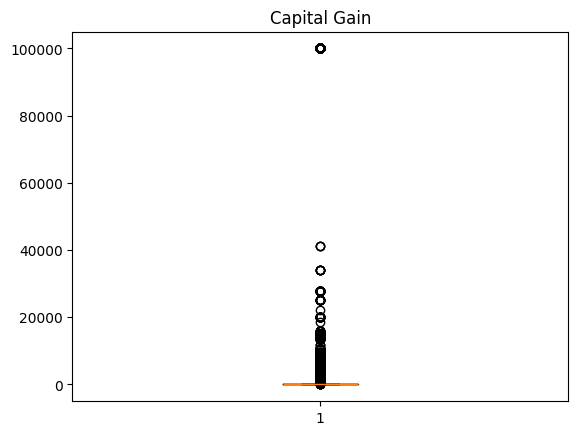

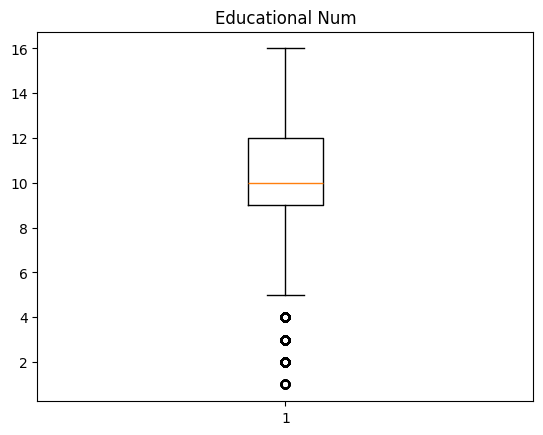

In [10]:
plt.boxplot(data['capital-gain'])
plt.title('Capital Gain')
plt.show()

plt.boxplot(data['educational-num'])
plt.title('Educational Num')
plt.show()

# Filter educational-num
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]

## 🗑️ Drop Redundant Features

In [11]:
data = data.drop(columns=['education'])

## 🔠 Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    data[column] = encoder.fit_transform(data[column])

## 🎯 Feature-Target Split

In [13]:
x = data.drop(columns=['income'])
y = data['income']

## 🤖 Model Training & Evaluation

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8149
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.69      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344

RandomForest Accuracy: 0.8490
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.62      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.84      9344

KNN Accuracy: 0.8245
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75      0.

## 📊 Model Comparison

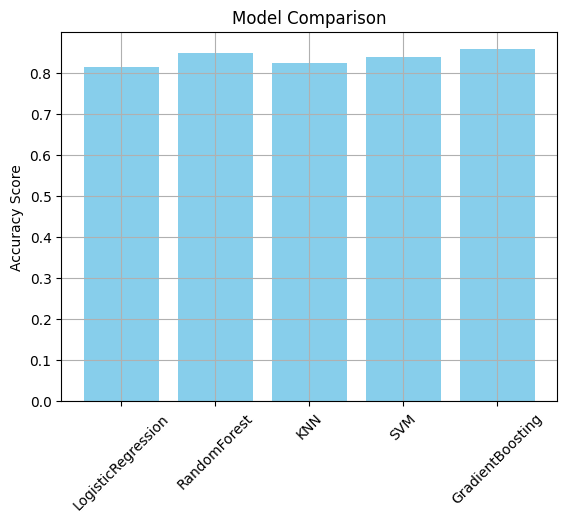

In [15]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 💾 Save Best Model

In [16]:
from sklearn.metrics import accuracy_score
import joblib

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
joblib.dump(best_model, 'best_model.pkl')
print(f"Saved best model ({best_model_name}) to 'best_model.pkl'")

Saved best model (GradientBoosting) to 'best_model.pkl'


In [19]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')



Overwriting app.py


In [18]:
# !streamlit run app.py